In [1]:
# 컨볼류션 신경망 설계  드랍아웃을 적용해서 유연한 구조로 변경 
# c c p d fc d fc   c c p fc fc 
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# load dataset
(x_train,y_train),(x_test,y_test)  = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype(np.float32)/255.0
x_test =  x_test.reshape(-1,28,28,1).astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# c c p d fc d fc  : c-c-p-fc-fc
# 2차원구조를 유지해야 하므로 reshape(60000,28,28,1)을 사용
cnn=Sequential()
cnn.add(Conv2D(32,(5,5),padding='same',activation='relu',input_shape = (28,28,1)))
cnn.add(Conv2D(64,(5,5),padding='same',activation='relu',input_shape = (28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10,activation='softmax'))

In [4]:
# 학습
cnn.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
hist =cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 18s - loss: 0.1897 - accuracy: 0.9421 - val_loss: 0.0499 - val_accuracy: 0.9840 - 18s/epoch - 38ms/step
Epoch 2/30
469/469 - 4s - loss: 0.0629 - accuracy: 0.9811 - val_loss: 0.0290 - val_accuracy: 0.9908 - 4s/epoch - 9ms/step
Epoch 3/30
469/469 - 4s - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0300 - val_accuracy: 0.9891 - 4s/epoch - 9ms/step
Epoch 4/30
469/469 - 4s - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0265 - val_accuracy: 0.9912 - 4s/epoch - 9ms/step
Epoch 5/30
469/469 - 4s - loss: 0.0305 - accuracy: 0.9907 - val_loss: 0.0306 - val_accuracy: 0.9896 - 4s/epoch - 9ms/step
Epoch 6/30
469/469 - 4s - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0278 - val_accuracy: 0.9907 - 4s/epoch - 9ms/step
Epoch 7/30
469/469 - 5s - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0265 - val_accuracy: 0.9915 - 5s/epoch - 10ms/step
Epoch 8/30
469/469 - 4s - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0221 - val_accuracy: 0.9933 - 4s/epoch - 9ms/step
Epoch 9/30
469/469 -

In [5]:
# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.9924


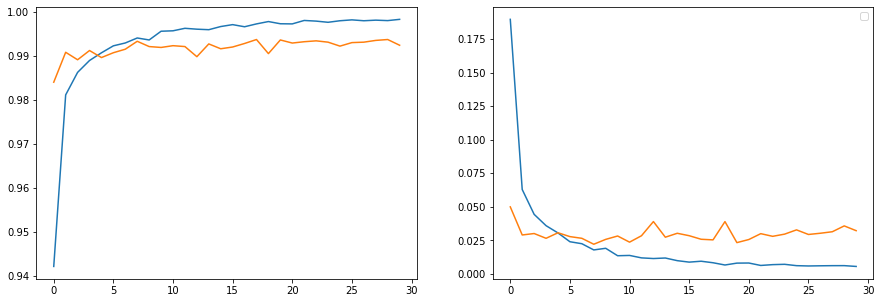

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.lineplot(data=hist.history['accuracy'],ax=ax[0])
sns.lineplot(data=hist.history['val_accuracy'],ax=ax[0])
plt.legend(['accuracy','val_accuracy'])
sns.lineplot(data=hist.history['loss'],ax=ax[1])
sns.lineplot(data=hist.history['val_loss'],ax=ax[1])

In [7]:
# 텐서플로에서 중요한 클래스 4
# model
# layers
# loss
# optimizer

In [ ]:
# functional API 함수
# 텐서가 흐르다가 중간에 여러개로 갈라지는 경우(출력이 여러개)
# 시계열이나 생성모델에서 종종 발생
